In [13]:
# ====================================
# CNN Scratch Implementation
# ====================================
import numpy as np
import matplotlib.pyplot as plt
import os

print("=== CNN Scratch Implementation ===")
os.makedirs("images", exist_ok=True)


=== CNN Scratch Implementation ===


In [14]:
# ------------------------
# Helper functions
# ------------------------
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def convolve2d(input_matrix, kernel, stride=1):
    k_size = kernel.shape[0]
    output_size = (input_matrix.shape[0] - k_size) // stride + 1
    output = np.zeros((output_size, output_size))
    for i in range(0, output_size*stride, stride):
        for j in range(0, output_size*stride, stride):
            output[i//stride, j//stride] = np.sum(input_matrix[i:i+k_size, j:j+k_size] * kernel)
    return output

def max_pool2d(feature_map, size=2, stride=2):
    output_size = (feature_map.shape[0] - size)//stride + 1
    output = np.zeros((output_size, output_size))
    for i in range(0, output_size*stride, stride):
        for j in range(0, output_size*stride, stride):
            output[i//stride, j//stride] = np.max(feature_map[i:i+size, j:j+size])
    return output

def mse_loss(pred, target):
    return np.mean((pred - target)**2)


In [15]:
# ------------------------
# Dataset (Toy Example)
# ------------------------
input_image = np.random.rand(5,5)    # Random 5x5 image
kernel = np.random.rand(3,3)         # Random 3x3 kernel


In [16]:
# ------------------------
# Forward pass
# ------------------------
conv_out = convolve2d(input_image, kernel)
relu_out = relu(conv_out)
pooled_out = max_pool2d(relu_out)

print("Input Image:\n", input_image)
print("Convolved Output:\n", conv_out)
print("ReLU Output:\n", relu_out)
print("Pooled Output:\n", pooled_out)


Input Image:
 [[0.87290803 0.95342481 0.95351784 0.60584806 0.41783792]
 [0.94250401 0.30396121 0.39683151 0.50833319 0.22684455]
 [0.13236637 0.09395774 0.31548625 0.91073278 0.17426254]
 [0.61599291 0.96172077 0.06873145 0.18700366 0.68271133]
 [0.26680079 0.06333021 0.57458803 0.47865065 0.0778137 ]]
Convolved Output:
 [[1.98887002 2.10776293 2.53216129]
 [2.3906736  1.82337587 1.64571206]
 [1.66384814 1.7281089  1.62534314]]
ReLU Output:
 [[1.98887002 2.10776293 2.53216129]
 [2.3906736  1.82337587 1.64571206]
 [1.66384814 1.7281089  1.62534314]]
Pooled Output:
 [[2.3906736]]


In [17]:
# ------------------------
# Modularized forward function
# ------------------------
def forward_cnn(input_image, kernel):
    conv = convolve2d(input_image, kernel)
    relu_out = relu(conv)
    pooled = max_pool2d(relu_out)
    return conv, relu_out, pooled


In [19]:
# ------------------------
# Training loop (Manual backpropagation)
# ------------------------
target_pooled = np.array([[1, 0], [0, 1]])  # Toy target for demonstration
lr = 0.01
epochs = 100
pool_size = 2
stride = 2
kernel_h, kernel_w = kernel.shape

for epoch in range(epochs):
    # Forward pass
    conv_out, relu_out, pooled_out = forward_cnn(input_image, kernel)
    
    # Compute loss
    loss = mse_loss(pooled_out, target_pooled)
    
    # Backprop through max pooling
    grad_pooled = 2 * (pooled_out - target_pooled) / target_pooled.size
    grad_relu = np.zeros_like(relu_out)
    for i in range(pooled_out.shape[0]):
        for j in range(pooled_out.shape[1]):
            pool_region = relu_out[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
            max_idx = np.unravel_index(np.argmax(pool_region, axis=None), pool_region.shape)
            grad_relu[i*stride + max_idx[0], j*stride + max_idx[1]] = grad_pooled[i,j]
    
    # Backprop through ReLU
    grad_conv = grad_relu * relu_derivative(conv_out)
    
    # Update kernel manually
    grad_kernel = np.zeros_like(kernel)
    for i in range(kernel_h):
        for j in range(kernel_w):
            grad_kernel[i,j] = np.sum(input_image[i:i+grad_conv.shape[0], j:j+grad_conv.shape[1]] * grad_conv)
    
    # Update kernel weights
    kernel -= lr * grad_kernel
    
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")


Epoch 1/100, Loss: 3.8246
Epoch 11/100, Loss: 3.2145
Epoch 21/100, Loss: 2.7255
Epoch 31/100, Loss: 2.3323
Epoch 41/100, Loss: 2.0148
Epoch 51/100, Loss: 1.7576
Epoch 61/100, Loss: 1.5483
Epoch 71/100, Loss: 1.3774
Epoch 81/100, Loss: 1.2371
Epoch 91/100, Loss: 1.1216
Epoch 100/100, Loss: 1.0348


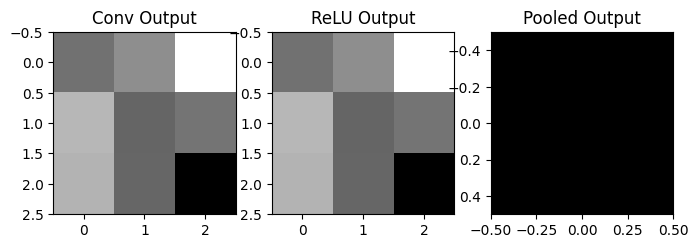

In [20]:
# ------------------------
# Visualization of feature maps
# ------------------------
conv_out, relu_out, pooled_out = forward_cnn(input_image, kernel)

plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.imshow(conv_out, cmap='gray')
plt.title("Conv Output")
plt.subplot(1,3,2)
plt.imshow(relu_out, cmap='gray')
plt.title("ReLU Output")
plt.subplot(1,3,3)
plt.imshow(pooled_out, cmap='gray')
plt.title("Pooled Output")
plt.savefig("images/cnn_forward_pass.png")
plt.show()


Scratch CNN implementation:
- Forward pass (Convolution -> ReLU -> Max Pool)
- Manual backpropagation updates kernel to match target pooled output
- Modular functions for convolution, activation, pooling
- Loss computation using MSE
- Visualization of feature maps saved in images/cnn_forward_pass.png
